<h2 style="color:blue">Ronak Pawar </h2>
<h2 style="color:blue"> 2021BIT022</h2> 
<h2 style="color:blue">Logistic Regression </h2>

In [31]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Separating the data and training the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Checking the Confusion Matrx and the accuracy
from sklearn import metrics
print("No Error")

No Error


In [32]:
# Importing the Dataset.
dataset = pd.read_csv("Covid Data.csv")


In [34]:
dataset.head(2)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97


# Data Pre-Processing

In [35]:
dataset.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.012169e+06,1.012169e+06,1.012169e+06,1.012169e+06,1.012169e+06,1.012169e+06,1.012169e+06,1.012169e+06,1.012169e+06,1.012169e+06,1.012169e+06,1.012169e+06,1.012169e+06,1.012169e+06,1.012169e+06,1.012169e+06,1.012169e+06,1.012169e+06,1.012169e+06,1.012169e+06
mean,1.630085e+00,8.871961e+00,1.499620e+00,1.194346e+00,7.920170e+01,3.398131e+00,4.180730e+01,4.978976e+01,2.192251e+00,2.266862e+00,2.248983e+00,2.304952e+00,2.133896e+00,2.437854e+00,2.267560e+00,2.131681e+00,2.263214e+00,2.220315e+00,5.388583e+00,7.923408e+01
std,4.827818e-01,3.744556e+00,5.000001e-01,3.956966e-01,3.712995e+01,1.212200e+01,1.695245e+01,4.751046e+01,5.478263e+00,5.192156e+00,5.174358e+00,5.523969e+00,5.285446e+00,6.671274e+00,5.249325e+00,5.231476e+00,5.194465e+00,5.381423e+00,1.862252e+00,3.708277e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012169 entries, 0 to 1012168
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1012169 non-null  int64 
 1   MEDICAL_UNIT          1012169 non-null  int64 
 2   SEX                   1012169 non-null  int64 
 3   PATIENT_TYPE          1012169 non-null  int64 
 4   DATE_DIED             1012169 non-null  object
 5   INTUBED               1012169 non-null  int64 
 6   PNEUMONIA             1012169 non-null  int64 
 7   AGE                   1012169 non-null  int64 
 8   PREGNANT              1012169 non-null  int64 
 9   DIABETES              1012169 non-null  int64 
 10  COPD                  1012169 non-null  int64 
 11  ASTHMA                1012169 non-null  int64 
 12  INMSUPR               1012169 non-null  int64 
 13  HIPERTENSION          1012169 non-null  int64 
 14  OTHER_DISEASE         1012169 non-null  int64 
 15

In [37]:
dataset.shape

(1012169, 21)

In [38]:
dataset.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [15]:
# dataset.corr

# Spilt the dataset

In [39]:
# #creating series of the dataset
X = dataset[['ASTHMA']]
y = dataset['CLASIFFICATION_FINAL']

In [40]:
X_train , X_test , y_train , y_test = train_test_split (X , y , test_size = 0.3,train_size=0.7 , random_state = 42)

In [41]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\vlanj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
y_pred = logreg.predict(X_test)
y_pred  

array([7, 7, 7, ..., 7, 7, 7], dtype=int64)

In [43]:
print ("Accuracy is: " , metrics.accuracy_score (y_test , y_pred))

Accuracy is:  0.4922098066530326


In [44]:
logreg.intercept_

array([-1.57627996, -3.02185267,  2.15571711, -0.78378175, -0.45675807,
        1.14488347,  2.53807188])

In [45]:
logreg.coef_

array([[ 0.13024504],
       [ 0.13137487],
       [ 0.11935607],
       [-0.73698922],
       [ 0.12076571],
       [ 0.12156835],
       [ 0.11367919]])

In [46]:
from sklearn.metrics import confusion_matrix
#Confusion Metrics
cm = confusion_matrix(y_test,y_pred)
cm

array([[     0,      0,     20,      0,      0,      0,   2619],
       [     0,      0,     13,      0,      0,      0,    531],
       [     0,      0,    352,      0,      0,      0, 103210],
       [     0,      0,      3,      0,      0,      0,    972],
       [     0,      0,     44,      0,      0,      0,   7825],
       [     0,      0,    138,      0,      0,      0,  38484],
       [     0,      0,    332,      0,      0,      0, 149108]],
      dtype=int64)

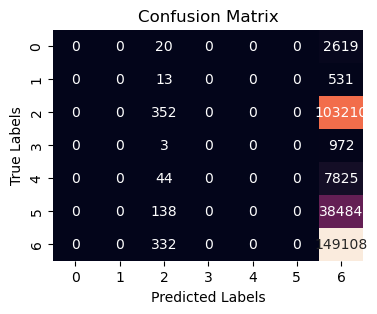

In [47]:
plt.figure(figsize=(4, 3))  # Adjust the figure size as needed

# Plot the heatmap
sns.heatmap(cm, annot=True, fmt='d', cbar=False)

# Add titles and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Display the plot
plt.show()

In [30]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1_score,_ = precision_recall_fscore_support(y_test, y_pred)


C:\Users\vlanj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Precision: [0.        0.        0.3902439 0.        0.        0.        0.4925136]
Recall: [0.         0.         0.00339893 0.         0.         0.
 0.99777837]
F1 Score: [0.         0.         0.00673916 0.         0.         0.
 0.65949415]
